Most Frequent, highest and lowest wine quality.

In [1]:
import pandas as pd
wine_data = pd.read_csv('wine_data.csv')

# Task 1: Most frequent, highest, and lowest wine quality
most_frequent_quality = wine_data['quality'].mode()[0]
highest_quality = wine_data['quality'].max()
lowest_quality = wine_data['quality'].min()

print(f"Most Frequent Quality: {most_frequent_quality}")
print(f"Highest Quality: {highest_quality}")
print(f"Lowest Quality: {lowest_quality}")


FileNotFoundError: [Errno 2] No such file or directory: 'wine_data.csv'

Correlations with quality

In [ ]:
correlations = wine_data[['fixed acidity', 'alcohol', 'free sulfur dioxide', 'quality']].corr()

fixed_acidity_corr = correlations.loc['fixed acidity', 'quality']
alcohol_corr = correlations.loc['alcohol', 'quality']
free_sulfur_corr = correlations.loc['free sulfur dioxide', 'quality']

print(f"Correlation between Fixed Acidity and Quality: {fixed_acidity_corr}")
print(f"Correlation between Alcohol and Quality: {alcohol_corr}")
print(f"Correlation between Free Sulfur Dioxide and Quality: {free_sulfur_corr}")


Correlation between Fixed Acidity and Quality: 0.12405164911322257
Correlation between Alcohol and Quality: 0.4761663239995377
Correlation between Free Sulfur Dioxide and Quality: -0.05065605724427594


Average Residual Sugar

In [ ]:
best_quality = wine_data['quality'].max()
avg_residual_sugar_best = wine_data[wine_data['quality'] == best_quality]['residual sugar'].mean()

lowest_quality = wine_data['quality'].min()
avg_residual_sugar_lowest = wine_data[wine_data['quality'] == lowest_quality]['residual sugar'].mean()

print(f"Average Residual Sugar for Best Quality Wine: {avg_residual_sugar_best}")
print(f"Average Residual Sugar for Lowest Quality Wine: {avg_residual_sugar_lowest}")


Average Residual Sugar for Best Quality Wine: 2.5777777777777775
Average Residual Sugar for Lowest Quality Wine: 2.6350000000000002


Effect of Volatile Acidity

<ipython-input-4-90552a4e0987>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='volatile acidity', data=wine_data, palette='viridis')


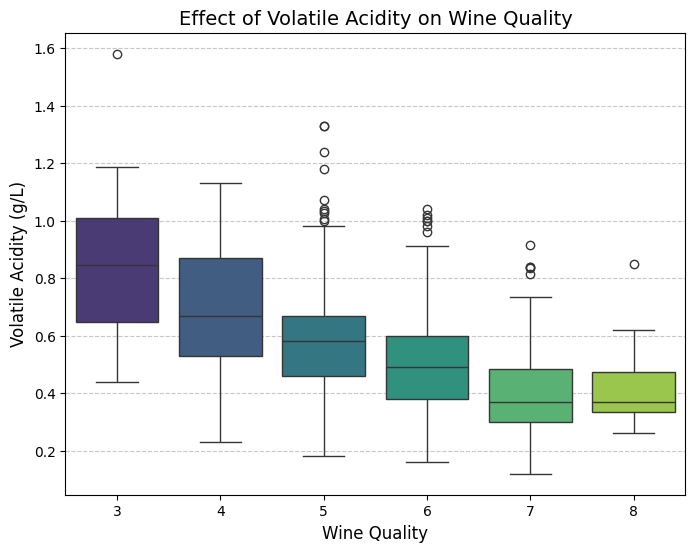

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='volatile acidity', data=wine_data, palette='viridis')
plt.title('Effect of Volatile Acidity on Wine Quality', fontsize=14)
plt.xlabel('Wine Quality', fontsize=12)
plt.ylabel('Volatile Acidity (g/L)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Train Decision Tree & Random Forests

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Splitting data into features (X) and target (y)
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


Decision Tree Accuracy: 0.56
Random Forest Accuracy: 0.66
